<div style="font-size:22pt; line-height:25pt, font-weight:bold; text-align:center;">Optimisation stochastique</div>

1. [Introduction - L'algorithme de Robbins-Monro](#sec1)
2. [Descente de gradient stochastique](#sec2)
3. [Variante et amélioration du gradient stochastique](#sec3)
3. [Références](#biblio)

# 1 .<a id="sec1"></a> Introduction - L'algorithme de Robbins-Monro

L'optimisation stochastique est, initialement, introduite par Robbins et Monro en 1951 [[1](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586)] pour résoudre les équations de type: $$ M(x) = \alpha, x\in I $$
Où $I$ est un intervalle quelconque. C'est un problème que l'on peut résoudre facilement avec une méthode de Newton en utilisant le pas: $$ x_{k+1} - x_{k} = -\frac{f(x_k)}{f'(x_k)} $$
où l'on pose $f(x) = M(x) - \alpha$. Cependant, utiliser une méthode de Newton peut être en pratique difficile, nous avons rarement accès à la fonction $M$ mais plutôt à des observations de cette dernière. Ces observations étant souvent bruitées de manière supposée aléatoire, nous n'avons pas moyen d'isoler la véritable valeur de $M$. On suppose, dans la suite, que l'observation $y$ de $M(x)$ correspont à une loi de probabilité telle que $E(y) = M(x)$. L'intérêt de l'algorithme de Robbins-Monro est donc de trouver une solution de cette équation en ayant seulement accès aux observations bruitées de $M$ (i.e $y$).

Pour celà on effectue le pas (qui définit un processus Markovien): $$ x_{k+1} - x_{k} = a_k(\alpha - y_k)$$ avec $x_1$ quelconque (assez proche de la solution), $y_k$ la k-ième observation de $M$, $(a_k)_{k \in N}$ vérifiant deux conditions: 

- $\sum_{k=2}^{+ \infty} \frac{a_k}{a_1+...+a_k-1} = \infty $

- $\sum_{k=1}^{+ \infty}a_k^2 < \infty $

Sachant que, $$ \sum_{k=2}^{+ \infty} \frac{1}{k(1+...+\frac{1}{k-1})}=\infty, \sum_{k=1}^{+ \infty}\frac{1}{k^2} = \frac{\pi^2}{6} $$ 
Toutes les suites de la forme $(\frac{c}{n})_{n \in N}$, avec $c$ une constante quelconque, satisfont ces conditions. 

Voici un exemple d'utilisation de cette méthode pour trouver la valeur de $\sqrt{3}$, pour différentes valeurs de $c$ et comparée à la méthode de Newton

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return x*x  + np.random.randn() #On bruite la fonction avec une gaussienne centrée réduite

def gradf(x):
    return 2*x #Pour l'algorithme de Newton on néglige, ici, le bruit pour le calcul du gradient de f

In [4]:
def RobbinsMonro(alpha,c,n,x0): #Algortihme de Robins Monro
    X=[]
    xk=x0
    X.append(xk)
    for i in range(n):
        xk = xk - (c/(i+1))*(f(xk)-alpha)
        X.append(xk)
    return X 

def Newton(alpha,n,x0): #Algorithme de Newton
    Y=[]
    xk=x0
    Y.append(xk)
    for i in range(n):
        xk = xk - (f(xk)-alpha)/gradf(xk)
        Y.append(xk)
    return Y

Text(0.5, 1.0, 'Approximation de racine de 3')

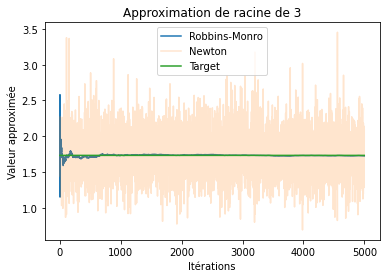

In [5]:
X=RobbinsMonro(3,1,5000,1.5)
Y=Newton(3,5000,2)
Z=[np.sqrt(3) for i in range(5000)]

plt.plot(X,label="Robbins-Monro")
plt.plot(Y, label ="Newton" ,alpha=.2)
plt.plot(Z, label = "Target")
plt.legend()
plt.xlabel("Itérations")
plt.ylabel("Valeur approximée")
plt.title("Approximation de racine de 3")

On voit bien que, losqu'il y a du bruit, l'algorithme de Robbins-Monro converge contrairement à l'algorithme de Newton, ce qui démontre, pour cet exemple simple, l'intérêt de cet algorithme. On peut observer que la convergence de l'algorithme de Robbins-Monro est d'abord très rapide sur les premières itérations, sur une plage plus ou moins étendues selon le choix de la suite $(a_k)_{k \in N}$, cet aspect est général aux algorithmes d'optimisation stochastique. Regardons maintenant ce qu'il se passe pour différentes valeurs de $c$.

Valeur réelle :  1.7320508075688772

Valeur approximée pour c = .01 :  1.5592223002529313
Valeur approximée pour c = .1 :  1.7358193265317303
Valeur approximée pour c = 1 :  1.7303745340468748
Valeur approximée pour c = 2 :  -inf


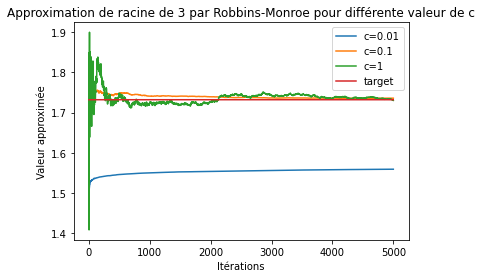

In [6]:
X1=RobbinsMonro(3,.01,5000,1.5)
X2=RobbinsMonro(3,.1,5000,1.5)
X3=RobbinsMonro(3,1,5000,1.5)
X4=RobbinsMonro(3,2,5000,1.5)

print("Valeur réelle : ",np.sqrt(3))
print("")
print("Valeur approximée pour c = .01 : ",X1[-1])
print("Valeur approximée pour c = .1 : ",X2[-1])
print("Valeur approximée pour c = 1 : ",X3[-1])
print("Valeur approximée pour c = 2 : ",X4[-1])
plt.plot(X1,label="c=0.01")
plt.plot(X2, label = "c=0.1")
plt.plot(X3, label = "c=1")
plt.plot(Z, label = "target")
plt.xlabel("Itérations")
plt.ylabel("Valeur approximée")
plt.title("Approximation de racine de 3 par Robbins-Monroe pour différente valeur de c")
plt.legend()

On remarque que la convergence de l'algorithme de Robbins-Monro dépend fortement de la suite $(a_k)_{k \in N}$. Dans le cas où $a_k = \frac{c}{k}$, pour des petites valeurs de $c$, la convergence est extrêmement lente, la convergence très rapide sur les première itérations étant atténuée. Cependant, pour des grandes valeurs de $c$, le processus est instable et nous pouvons obtenir un processus divergeant (empiriquement, dès que $c>1$).

### Conclusion

L'algorithme de Robbins-Monro introduit une manière efficace de résoudre les problèmes d'approximation numérique dans le cas où les observations ne sont qu'une réprésentation bruitée de la fonction avec laquelle on souhaite travailler. Ces problèmes ne pouvant être résolus par des méthodes usuelles telles que la méthode de Newton. Cependant, cette méthode, dans son état initial, converge plus ou moins efficacement selon le choix de ces paramètres, ce qui complique son utilisation. 

Cet algorithme marque le début de l'optimisation stochastique qui est un domaine très actif avec une application directe au Machine Learning [[2](https://arxiv.org/pdf/1606.04838.pdf)], [[3](https://ieeexplore.ieee.org/abstract/document/4039068)], [[4](https://leon.bottou.org/publications/pdf/nimes-1991.pdf)]. En effet, cet algorithme introduit  l'algorithme du gradient stochastique sous une forme markovienne. Les algorithmes de descentes de gradient étant une composante majeure des algorithmes de Machine Learning (SVM, régression linéaire, backpropagation des réseaux de neurones...), le gradient stochastique permet de réaliser ces descentes de gradient malgré le bruit des données.

# 2 .<a id="sec2"></a> Descente de gradient stochastique


Dans le cas d'un problème de Machine Learning, on cherche généralement à minimiser une fonction de perte $l(.,.): \mathbb{R}^{d_y} \times \mathbb{R}^{d_y} \rightarrow \mathbb{R}$ appliqué à un modéle $h(.;.): \mathbb{R}^{d_x} \times \mathbb{R}^d \rightarrow \mathbb{R}^{d_y}$ paramétré par un vecteur de paramètres $w \in \mathbb{R}^d$. ($d_x,d_y$ sont les dimensions de l'espace des entrées et des sorties.).  En pratique ceci revient  à minimiser : $$R_n(w) = \frac{1}{n} \sum _{i=0}^n l(h(x_i;w),y_i)$$ que l'on notera $$R_n(w) = \frac{1}{n} \sum_{i=0}^{n} f_i(w).$$ Avec $f_i(w) = l(h(x_i;w),y_i)$. L'algorithme de descente de gradient stochastique fait le pas (dans sa version la plus simple): $$w_{k+1} - w_{k} = - \alpha_k \nabla f_{i_k}(w_k)$$ 
Cet algorithme s'écrit alors :

&nbsp;&nbsp;&nbsp; 1: &nbsp; Choose initial parameters $w_0$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>for</b> k = 0, 1, 2, ... <b>do</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Choose an observation $i_k$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Compute $\nabla f_{i_k}(w_k)$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $w_{k+1} = w_k - \alpha_k \nabla f_{i_k}(w_k)$ <br>
&nbsp;&nbsp;&nbsp;    6: &nbsp;  <b>end for</b>

Le choix de $(\alpha_k)_{k \in N}$ n'est pas évident, on prendra ici une suite constante prédéfinie, par simplicité. Le gradient stochastique modifie donc les paramètres du modèle à chaque entrée évaluée ce qui peut permettre de faire un apprentissage online et d'avoir un apprentissage immédiat. Cet algorithme est efficace pour les jeux de données très volumineux. 

A l'inverse, avec une approche de batch on modifie les paramètres du modèle avec le pas : $$w_{k+1} - w_{k} = - \alpha_k \nabla R_n(w_k) = -\frac{\alpha_k}{n} \sum _{i=0}^n \nabla f_i(w_k)$$ 
On doit donc parcourir l'ensemble des données pour pouvoir modifier le modèle ce qui peut être long pour les gros jeux de données, chaque pas nécessitant un grand nombre de calcul. 
Ainsi l'optimisation stochastique et l'optimisation par batch se différencient fondamentalement sur le nombre de calculs nécessaires pour pouvoir faire un pas. 

Dans l'exemple qui suit nous comparons les deux descentes de gradient présentés précédemment pour résoudre un probléme de régression linéaire simple.

#### Example : Regression linéaire simple
Nous cherchons à trouver l'équation de la droite $h(x;w) = w_0 + w_1 x$ avec $w =  \begin{pmatrix} w_0  \\ w_1 \end{pmatrix}$ qui convient le mieux à notre set de données. Pour celà nous créons 500 000 points autour de la droite de paramètres $w^* =  \begin{pmatrix} 17  \\ 2 \end{pmatrix}$. On cherche donc à minimiser $R_n(w) = {1 \over 2n} \sum\limits_{i=1}^n (h(x_i;w)-y_i)^2={1 \over 2n} \sum\limits_{i=1}^n f_i(w)$ avec $f_i(w)=(h(x_i;w)-y_i)^2$.

Ce qui donne: $$ \nabla R_n(w) = \begin{pmatrix} \frac{1}{n}  \sum\limits_{i=1}^n (h(x_i;w)-y_i)  \\ \frac{1}{n}  \sum\limits_{i=1}^n ((h(x_i;w)-y_i) \cdot x_i) \end{pmatrix}$$

et $$ \nabla f_i(w) = \begin{pmatrix} 2(h(x_i;w)-y_i)  \\  2x_i(h(x_i;w)-y_i) \end{pmatrix}$$

In [7]:
f = lambda x: x*2+17+np.random.randn(len(x))*10

x = np.random.random(500000)*100
y = f(x) 
m = len(y)

In [8]:
h = lambda w,x: w[0] + w[1]*x
cost = lambda w, x_i, y_i: 0.5*(h(w,x_i)-y_i)**2

In [9]:
w_old = np.array([0.,0.])
w_new = np.array([1.,1.]) 
alpha_k = 0.000005 

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(10):
    print("*")
    for i in range(m):
        iter_num += 1 
        w_old = w_new
        s_k[0] = (h(w_old,x[i])-y[i])
        s_k[1] = (h(w_old,x[i])-y[i])*x[i]
        s_k = (-1)*s_k
        w_new = w_old + (alpha_k) * s_k
        sum_cost += cost(w_old,x[i],y[i])
        if (i+1) % 10000 == 0:
            cost_list.append(sum_cost/10000)
            sum_cost = 0   
            
print("Minimum local obtenu:")
print("w_0 =", w_new[0])
print("w_1 =", w_new[1])

*
*
*
*
*
*
*
*
*
*
Minimum local obtenu:
w_0 = 16.95903860188867
w_1 = 1.9978618965306771


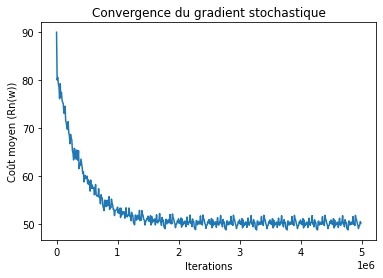

In [10]:
iterations = np.arange(len(cost_list))*10000
plt.plot(iterations,cost_list)
plt.title("Convergence du gradient stochastique")
plt.xlabel("Iterations")
plt.ylabel("Coût moyen (Rn(w))")
plt.show()

On observe que la convergence du gradient stochastique est satisfaisante, cependant on approche rapidement le minimum recherché $w^* =  \begin{pmatrix} 17  \\ 2 \end{pmatrix}$ mais on oscille autour de ce paramétrage. Ce fait vient en partie du poids $(a_k)_{k\in \mathbb N}$ que l'on a choisit constant, pour atténuer cet effet nous pourrions choisir de réduire le poids $a_k$ petit à petit en le multipliant par une constante $\epsilon$. Mais il reste à décider quand effectuer cette division, ce qui n'est pas évident. De manière plus formelle nous devrions choisir un poids $(a_k)_{k\in \mathbb N}$ qui vérifie les conditions de l'algorithme de Robbins-Monroe, mais il faudrait alors s'assurer que la convergence soit suffisamment rapide pour utiliser cet algorithme. 

In [29]:
def R_n(x,y,m,w):
    R = 0
    for i in range(m):
        R += (h(w,x[i])-y[i])**2
    R =R/(2*m)
    return R

def gradR_n(x,y,m,w):
    grad = np.array([0.,0.])
    for i in range(m):
        grad[0] += (h(w,x[i])-y[i])
        grad[1] += (h(w,x[i])-y[i])*x[i]
    grad = grad/(m)
    return grad

In [30]:
w_old = np.array([0.,0.])
w_new = np.array([1.,1.]) # The algorithm starts at [1,1]
alpha_k = 0.000005 # step size
s_k = float("inf")

for i in range(10):
    w_old = w_new
    s_k = -gradR_n(x,y,m,w_old)
    w_new = w_old + alpha_k * s_k
    print("steps ",i,": w=", w_new)

print("Minimum local obtenu:")
print("w_0 =", w_new[0])
print("w_1 =", w_new[1])

steps  0 : w= [1.00033031 1.02069444]
steps  1 : w= [1.00065544 1.04104349]
steps  2 : w= [1.00097547 1.06105291]
steps  3 : w= [1.0012905  1.08072839]
steps  4 : w= [1.0016006  1.10007549]
steps  5 : w= [1.00190586 1.11909968]
steps  6 : w= [1.00220635 1.13780637]
steps  7 : w= [1.00250216 1.15620084]
steps  8 : w= [1.00279337 1.17428831]
steps  9 : w= [1.00308005 1.19207391]
Minimum local obtenu:
w_0 = 1.003080048308691
w_1 = 1.1920739103974722


Sur le même nombre de calcul on voit que la méthode de descente de gradient par batch ne fonctionne pas aussi bien que le gradient stochastique sur des gros jeux de données. Cependant, cette méthode fonctionne bien si l'on réduit drastiquement la quantité de données (ici on ne perd pas d'information en réduissant le nombre de données par construction du set de données).

In [31]:
X = x[:5000]
Y = y[:5000]
M = 5000
w_old = np.array([0.,0.])
w_new = np.array([1.,1.]) 
alpha_k = 0.0005 
s_k = float("inf")
precision = 0.1
n_step = 0

while np.linalg.norm(s_k)>precision:
    w_old = w_new
    s_k = -gradR_n(X,Y,M,w_old)
    w_new = w_old + alpha_k * s_k
    n_step +=1
    if n_step % 1000 == 0:
        print("steps ",n_step,": w=", w_new," s_k=",s_k)

print("Minimum local obtenu:")
print("w_0 =", w_new[0])
print("w_1 =", w_new[1])
print(n_step)

steps  1000 : w= [2.87475626 2.20899577]  s_k= [ 3.48940039 -0.05210967]
steps  2000 : w= [4.51643894 2.18447936]  s_k= [ 3.08599189 -0.04608529]
steps  3000 : w= [5.96832719 2.16279729]  s_k= [ 2.72922132 -0.04075738]
steps  4000 : w= [7.25236309 2.14362188]  s_k= [ 2.41369689 -0.03604543]
steps  5000 : w= [8.387952   2.12666333]  s_k= [ 2.13465014 -0.03187823]
steps  6000 : w= [9.39225583 2.11166536]  s_k= [ 1.8878639 -0.0281928]
steps  7000 : w= [10.2804524   2.09840129]  s_k= [ 1.66960854 -0.02493344]
steps  8000 : w= [11.06596484  2.08667068]  s_k= [ 1.47658561 -0.02205089]
steps  9000 : w= [11.76066443  2.07629624]  s_k= [ 1.30587801 -0.0195016 ]
steps  10000 : w= [12.37505002  2.06712119]  s_k= [ 1.15490586 -0.01724702]
steps  11000 : w= [12.91840668  2.05900686]  s_k= [ 1.02138755 -0.0152531 ]
steps  12000 : w= [13.39894604  2.05183063]  s_k= [ 0.90330525 -0.01348969]
steps  13000 : w= [13.8239304   2.04548404]  s_k= [ 0.79887441 -0.01193015]
steps  14000 : w= [14.19978245  2.0

On voit donc que la méthode de descente par batch converge bien sur un jeu de donnée plus petit $\#(X) = 5000$. Cependant, même sur un petit jeu de données, il faut un grand nombre de calcul pour converger ($ \sim 10^8$). 

### Conclusion
D'un coté, il y a le gradient stochastique qui converge rapidement sur des gros jeux de données mais qui nécessite la recherche d'une suite de poids $(a_k)_{k \in \mathbb N}$ adaptée afin d'avoir une convergence non-bruitée. De l'autre, il y a la descente par batch qui n'est pas adapté aux gros jeux de données et qui nécessite un grand nombre de calcul.

Formellement, pour un très grand nombre de données $n$, le gradient stochastique a une compléxité, pour une $\epsilon$-optimalité, $\tau \sim \frac{1}{\epsilon}$ alors que l'optimisation par batch a une compléxité $\tau \sim nlog(\epsilon)$ [[5](https://arxiv.org/pdf/1606.04838.pdf#page=86&zoom=100,96,412)]. Il faut donc, pour un $\epsilon$ donné, un minimum de donnée pour que le gradient stochastique soit plus rapide que l'optimisation par batch.

Cependant, le gradient stochastique ne se réduit pas à l'utilisation d'une seule observation pour effectuer un pas. En effet, dans sa version formelle, le choix de l'observation est inclus dans le choix d'une réalisation que l'on note $\xi_k$ afin de calculer un vecteur stochastique $g(w_k,\xi_k)$ qui nous servira de gradient à chaque itération. Cette réalisation peut se réduire au choix d'une seule observation, comme nous venons de le faire, ou bien à plusieurs observations pour calculer une moyenne pondérée, par exemple. On parle alors, de manière abusive, d'optimisation par mini-batch (au lieu de gradient stochastique). L'optimisation par mini-batch est très efficace et réunit le meilleur du gradient stochastique simple et de la descente de gradient par batch. On effectue alors le pas:

$$w_{k+1} - w_{k} = - \alpha_k \frac{1}{n_k} \sum \limits_{i=1}^{n_k} \nabla f_{k_i}(w_k)$$ 

In [32]:
def g(x,y,n,w):
    G = np.array([0.,0.])
    for i in range(n):
        G[0]+=(h(w,x[i])-y[i])
        G[1]+=(h(w,x[i])-y[i])*x[i]
    return G/n

In [33]:
w_old = np.array([0.,0.])
w_new = np.array([1.,1.]) # The algorithm starts at [1,1]
alpha_k = 0.000008 # step size
nk=10

iter_num = 0
s_k = np.array([float("inf"),float("inf")])
sum_cost = 0
cost_list = []

for j in range(60):
    for i in range(int(m/nk)):
        iter_num += 1 
        w_old = w_new
        s_k = (-1)*g(x[nk*i:nk+nk*i],y[nk*i:nk+nk*i],nk,w_old)
        w_new = w_old + (alpha_k) * s_k
    cost_list.append(R_n(x,y,m,w_new)) #Ligne qui réduit les peformences
    if j%6==0:
        print("Epoch = ",j+1)
        print("w =",w_new,"s_k =",s_k)
            
            
print("Minimum local obtenu:")
print("w_0 =", w_new[0])
print("w_1 =", w_new[1])

Epoch =  1
w = [2.53363982 2.20296041] s_k = [  9.86255141 390.00427035]
Epoch =  7
w = [9.0430252  2.10746118] s_k = [  8.60574061 425.70023103]
Epoch =  13
w = [12.62149661  2.05496141] s_k = [  7.91482108 445.32373881]
Epoch =  19
w = [14.58872652  2.02610017] s_k = [  7.53499478 456.11157168]
Epoch =  25
w = [15.67019207  2.01023398] s_k = [  7.32618896 462.04207805]
Epoch =  31
w = [16.26471725  2.0015117 ] s_k = [  7.21139999 465.30231635]
Epoch =  37
w = [16.59155169  1.99671671] s_k = [  7.14829586 467.09460069]
Epoch =  43
w = [16.77122576  1.99408071] s_k = [  7.11360498 468.07989161]
Epoch =  49
w = [16.86999983  1.99263159] s_k = [  7.09453401 468.62154573]
Epoch =  55
w = [16.92429992  1.99183496] s_k = [  7.08404993 468.91931482]
Minimum local obtenu:
w_0 = 16.95032912613683
w_1 = 1.9914530815268625


Text(0, 0.5, 'Rn(w)')

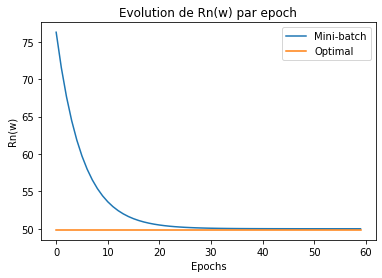

In [35]:
target = R_n(x,y,m,[17,2])
target=[target for x in range(60)]

plt.plot(cost_list,label="Mini-batch")
plt.plot(target,label="Optimal")
plt.legend()
plt.title("Evolution de Rn(w) par epoch")
plt.xlabel("Epochs")
plt.ylabel("Rn(w)")

La convergence du gradient stochastique par mini-batch se fait sans le bruit que l'on a en utilisant le gradient stochastique simple. C'est une version très efficace du gradient stochastique qui est courament utilisé. Cependant, le gain en stabilité de cet algorithme se fait au dépend d'une perte en perfomance, pour obtenir une solution du même ordre que celle obtenue par le gradient stochastique simple il a fallu ~40 epochs (à la place de 10 epochs pour la version simple). 

En pratique la taille des batchs peut se choisir lors de l'entraînement d'un réseau de neurones, [PyTorch](https://pytorch.org/docs/stable/data.html#loading-batched-and-non-batched-data).

# 3 .<a id="sec3"></a> Variante et amélioration du gradient stochastique

L'un des points faibles du gradient stochastique est qu'il a du mal à avancer dans les zones où la pente est beaucoup plus importante dans une direction que dans les autres [[6](http://incompleteideas.net/papers/sutton-86.pdf)]. Pour palier à ce problème on introduit la notion de vitesse [[7](http://doi.org/10.1016/S0893-6080(98)00116-6)].

<img src="https://paperswithcode.com/media/methods/Screen_Shot_2020-05-28_at_3.25.40_PM_Y687HvA.png" />

Le pas devient donc :

$$ v_k - \gamma v_{k-1} = \alpha  g(w_k-\gamma v_{k-1},\xi_k)$$
$$w_k - w_{k-1} = - v_k$$

Avec $\alpha_k = \alpha, \forall k\in \mathbb N$.
Beaucoup de variantes du gradient stochastique sont des élaborations de cette idée, comme [NAG](http://mpawankumar.info/teaching/cdt-big-data/nesterov83.pdf), [AdaGrad](https://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf), [AdaDelta](http://arxiv.org/abs/1212.5701), [Adam](https://arxiv.org/pdf/1412.6980.pdf).

# <a id="biblio"></a> Références

[[1]](https://projecteuclid.org/download/pdf_1/euclid.aoms/1177729586) H. Robbins and S. Monro. A Stochastic Approximation Method. *The Annals of Mathematical
Statistics, 22(3):400–407*, 1951.

[[2]](https://arxiv.org/pdf/1606.04838.pdf)  L. Bottou, F. E. Curtis and J. Nocedal. Optimization Methods for Large-Scale Machine Learning. *arXiv preprint arXiv:1606.04838v3*, 2018.

[[3]](https://ieeexplore.ieee.org/abstract/document/4039068)  S.-I. Amari. A theory of adaptive pattern classifiers. *IEEE Transactions on Electronic
Computers, EC-16:299–307,* 1967.

[[4]](https://leon.bottou.org/publications/pdf/nimes-1991.pdf)  L. Bottou. Stochastic Gradient Learning in Neural Networks. *In Proceedings of Neuro-Nîmes
91, Nimes, France,* 1991. 

[[5]](https://leon.bottou.org/publications/pdf/nimes-1991.pdf)  L. Bottou and O. Bousquet. The Tradeoffs of Large Scale Learning. In J. C. Platt, D. Koller,
Y. Singer, and S. T. Roweis, editors, *Advances in Neural Information Processing Systems 20,
pages 161–168. Curran Associates, Inc.,* 2008

[[6]](https://arxiv.org/pdf/1606.04838.pdf#page=86&zoom=100,96,412) Sutton, R. S. Two problems with backpropagation and other steepest-descent learning procedures for networks. *Proc. 8th Annual Conf. Cognitive Science Society*, 1986

[[7]](http://doi.org/10.1016/S0893-6080(98)00116-6) Qian, N. On the momentum term in gradient descent learning algorithms. *Neural Networks : The Official Journal of the International Neural Network Society, 12(1), 145–151.* 1999

[[8]](http://mpawankumar.info/teaching/cdt-big-data/nesterov83.pdf) Nesterov, Y. A method for unconstrained convex minimization problem with the rate of convergence o(1/k2). *Doklady ANSSSR (translated as Soviet.Math.Docl.), vol. 269, pp. 543– 547.* 1983

[[9]](https://jmlr.org/papers/volume12/duchi11a/duchi11a.pdf) Duchi, J., Hazan, E., & Singer, Y. Adaptive Subgradient Methods for Online Learning and Stochastic Optimization. *Journal of Machine Learning Research, 12, 2121–2159.* 2011

[[10]](http://arxiv.org/abs/1212.5701) Zeiler, M. D. ADADELTA: An Adaptive Learning Rate Method. *arXiv preprint arXiv:1212.5701v1* 2012

[[11]](https://arxiv.org/pdf/1412.6980.pdf) Kingma, D. P., & Ba, J. L. Adam: a Method for Stochastic Optimization. *International Conference on Learning Representations, 1–13* 2015